In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as g

In [20]:
tabela = pd.read_csv("data_science_salaries.csv")
tabela.head()
# Tem muitos cargos, talvez nao seja a melhor abordagem. Será que por tempo de experiencia temos resultados?

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


### Primeiro em Matplotlib

<BarContainer object of 4 artists>

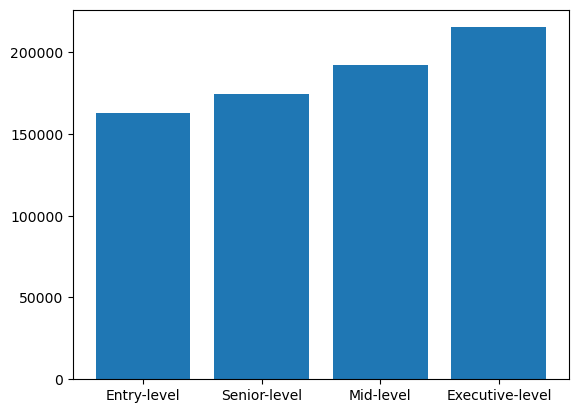

In [83]:
media_salarial = []
for level in tabela["experience_level"].unique():
    media_salarial.append(tabela.loc[tabela.experience_level == level].salary.mean())
grafico_salarios = pd.DataFrame({"experiencia": tabela["experience_level"].unique(),
                                "salario_medio": media_salarial
                                })
grafico_salarios = grafico_salarios.sort_values(by="salario_medio")
plt.bar(grafico_salarios.experiencia, grafico_salarios.salario_medio)

### Agora com plotly

In [88]:
px.bar(grafico_salarios, x= "experiencia", y= "salario_medio", 
       labels={'experiencia':'Experiência profissional', "salario_medio": "Média salarial (USD)"}
       )


Text(0.5, 1.0, 'numero de paises')

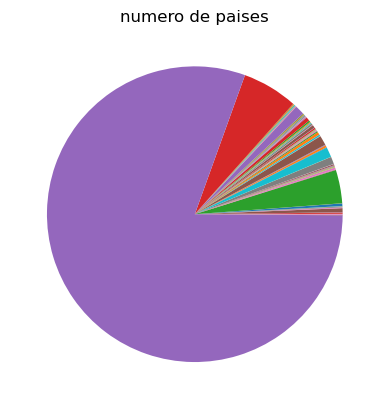

In [125]:
grupo = tabela.groupby("employee_residence")["salary_in_usd"].agg(['mean', 'median', 'min', 'max', 'count'])
plt.pie(grupo["count"])
plt.title("numero de paises")